In [1]:
#import required modules and packages
from bs4 import BeautifulSoup as bs
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image
from mplsoccer import Pitch, VerticalPitch
from mplsoccer.utils import FontManager
from highlight_text import HighlightText, ax_text, fig_text

In [2]:
#scrape from understat
#16405
base_url = 'https://understat.com/match/'
match = str(input("PLease enter a match ID: "))
url = base_url + match

In [3]:
url

'https://understat.com/match/16405'

In [4]:
#scraping all the scripts in the webpage
req = requests.get(url)
soup = bs(req.content,'lxml')
scripts = soup.find_all('script')

In [5]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22429305\x22,\x22minute\x22\x3A\x222\x22,\x22result\x22\x3A\x22SavedShot\x22,\x22X\x22\x3A\x220.885\x22,\x22Y\x22\x3A\x220.29100000381469726\x22,\x22xG\x22\x3A\x220.06860102713108063\x22,\x22player\x22\x3A\x22Ra\x5Cu00fal\x20Jim\x5Cu00e9nez\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x224105\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222021\x22,\x22shotType\x22\x3A\x22RightFoot\x22,\x22match_id\x22\x3A\x2216405\x22,\x22h_team\x22\x3A\x22Wolverhampton\x20Wanderers\x22,\x22a_team\x22\x3A\x22Manchester\x20United\x22,\x22h_goals\x22\x3A\x220\x22,\x22a_goals\x22\x3A\x221\x22,\x22date\x22\x3A\x222021\x2D08\x2D29\x2015\x3A30\x3A00\x22,\x22player_assisted\x22\x3A\x22Adama\x20Traor\x5Cu00e9\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\

In [6]:
#get only shot data script
strings = scripts[1].string

In [7]:
#strip data into correct json format
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
#encode data
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [8]:
data

{'h': [{'id': '429305',
   'minute': '2',
   'result': 'SavedShot',
   'X': '0.885',
   'Y': '0.29100000381469726',
   'xG': '0.06860102713108063',
   'player': 'Raúl Jiménez',
   'h_a': 'h',
   'player_id': '4105',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '16405',
   'h_team': 'Wolverhampton Wanderers',
   'a_team': 'Manchester United',
   'h_goals': '0',
   'a_goals': '1',
   'date': '2021-08-29 15:30:00',
   'player_assisted': 'Adama Traoré',
   'lastAction': 'Pass'},
  {'id': '429306',
   'minute': '5',
   'result': 'BlockedShot',
   'X': '0.8809999847412109',
   'Y': '0.3579999923706055',
   'xG': '0.2714335322380066',
   'player': 'Trincão',
   'h_a': 'h',
   'player_id': '8934',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'LeftFoot',
   'match_id': '16405',
   'h_team': 'Wolverhampton Wanderers',
   'a_team': 'Manchester United',
   'h_goals': '0',
   'a_goals': '1',
   'date': '2021-08-29 15:30:00',
   'play

In [9]:
x = []
y = []
xG = []
team = []
result = []
player = []
data_away = data['a']
data_home = data['h']

#loop through each line in home team dictionary
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])

#loop through each line in away team dictionary
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])

In [10]:
#create dataframe
col_names = ['team','player','x','y','xG','result']
shots = pd.DataFrame([team,player,x,y,xG,result],index=col_names)
shots = shots.T

In [11]:

#convert numerical string to float
shots['x'] = pd.to_numeric(shots['x'])
shots['y'] = pd.to_numeric(shots['y'])
shots['xG'] = pd.to_numeric(shots['xG'])

#adjust coordinate values
shots['x'] = shots['x']*100
shots['y'] = shots['y']*100

shots['xx'] = shots['y']
shots['yy'] = shots['x']

shots['x'] = shots['xx']
shots['y'] = shots['yy']

shots['x'] = shots['x']*.8
shots['y'] = shots['y']*1.2

#invert x-axis values
shots['x'] = 80 - shots['x']

shots

,team,player,x,y,xG,result,xx,yy
0,Wolverhampton Wanderers,Raúl Jiménez,56.720000,106.200000,0.068601,SavedShot,29.100000,88.500000
1,Wolverhampton Wanderers,Trincão,51.360001,105.719998,0.271434,BlockedShot,35.799999,88.099998
2,Wolverhampton Wanderers,Adama Traoré,46.720001,93.480002,0.032173,SavedShot,41.599998,77.900002
3,Wolverhampton Wanderers,Raúl Jiménez,29.839999,104.760004,0.082377,BlockedShot,62.700001,87.300003
4,Wolverhampton Wanderers,João Moutinho,41.760001,108.600000,0.136293,MissedShots,47.799999,90.500000
5,Wolverhampton Wanderers,Conor Coady,33.679999,107.280002,0.014709,MissedShots,57.900002,89.400002
6,Wolverhampton Wanderers,Raúl Jiménez,44.160001,93.360004,0.030097,BlockedShot,44.799999,77.800003
7,Wolverhampton Wanderers,Adama Traoré,42.960001,91.560004,0.018761,BlockedShot,46.299999,76.300003
8,Wolverhampton Wanderers,Rúben Neves,56.480000,94.080002,0.016421,MissedShots,29.400000,78.400002
9,Wolverhampton Wanderers,Raúl Jiménez,34.960001,113.400000,0.080537,MissedShots,56.299999,94.500000


In [12]:
#classify WOV and MUN shots
wovshots = shots[(shots.team == 'Wolverhampton Wanderers')].reset_index()
munshots = shots[(shots.team =='Manchester United')].reset_index()

In [13]:
wovshots

,index,team,player,x,y,xG,result,xx,yy
0,0,Wolverhampton Wanderers,Raúl Jiménez,56.720000,106.200000,0.068601,SavedShot,29.100000,88.500000
1,1,Wolverhampton Wanderers,Trincão,51.360001,105.719998,0.271434,BlockedShot,35.799999,88.099998
2,2,Wolverhampton Wanderers,Adama Traoré,46.720001,93.480002,0.032173,SavedShot,41.599998,77.900002
3,3,Wolverhampton Wanderers,Raúl Jiménez,29.839999,104.760004,0.082377,BlockedShot,62.700001,87.300003
4,4,Wolverhampton Wanderers,João Moutinho,41.760001,108.600000,0.136293,MissedShots,47.799999,90.500000
5,5,Wolverhampton Wanderers,Conor Coady,33.679999,107.280002,0.014709,MissedShots,57.900002,89.400002
6,6,Wolverhampton Wanderers,Raúl Jiménez,44.160001,93.360004,0.030097,BlockedShot,44.799999,77.800003
7,7,Wolverhampton Wanderers,Adama Traoré,42.960001,91.560004,0.018761,BlockedShot,46.299999,76.300003
8,8,Wolverhampton Wanderers,Rúben Neves,56.480000,94.080002,0.016421,MissedShots,29.400000,78.400002
9,9,Wolverhampton Wanderers,Raúl Jiménez,34.960001,113.400000,0.080537,MissedShots,56.299999,94.500000


In [14]:
munshots

,index,team,player,x,y,xG,result,xx,yy
0,15,Manchester United,Bruno Fernandes,48.160001,87.360004,0.018621,MissedShots,39.799999,72.800003
1,16,Manchester United,Bruno Fernandes,44.560001,86.760004,0.046497,BlockedShot,44.299999,72.300003
2,17,Manchester United,Daniel James,56.720000,106.319998,0.035727,MissedShots,29.100000,88.599998
3,18,Manchester United,Mason Greenwood,42.560001,109.919998,0.510893,MissedShots,46.799999,91.599998
4,19,Manchester United,Mason Greenwood,22.640002,108.000000,0.114599,MissedShots,71.699997,90.000000
5,20,Manchester United,Fred,35.200000,89.160004,0.016975,SavedShot,56.000000,74.300003
6,21,Manchester United,Harry Maguire,43.120001,104.639996,0.022552,BlockedShot,46.099998,87.199997
7,22,Manchester United,Paul Pogba,53.600000,103.680002,0.046484,SavedShot,33.000000,86.400002
8,23,Manchester United,Bruno Fernandes,47.279999,109.800000,0.092846,MissedShots,40.900002,91.500000
9,24,Manchester United,Mason Greenwood,55.760001,109.560004,0.057141,Goal,30.299999,91.300003


In [15]:
background = '#22312b'
text_color = 'white'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

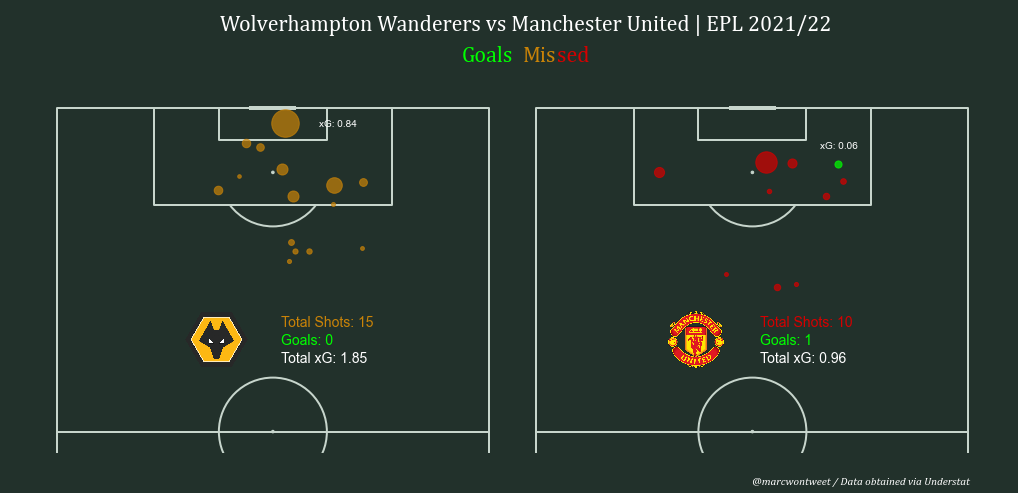

In [37]:
#set up figures and axes
fig, ax = plt.subplots(figsize=(18,8.5))
ax.axis('off')
fig.set_facecolor(background)

#plot Wolves pitch
pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc', tight_layout=True, constrained_layout=False, half=True)
ax_sb1 = fig.add_axes((0.03, 0.15,0.6,0.6))
ax_sb1.patch.set_facecolor(background)
pitch.draw(ax=ax_sb1)

#plot Wolves shots:
for j in range (len(wovshots['x'])):
    if wovshots['result'][j] == 'Goal':
        sp = pitch.scatter(wovshots['y'][j],wovshots['x'][j], s=wovshots['xG'][j]*900,c='#00ff00',alpha=.7,ax=ax_sb1)
    else:
        sp = pitch.scatter(wovshots['y'][j],wovshots['x'][j], s=wovshots['xG'][j]*900,c='#c98308',alpha=.7, ax=ax_sb1)

#plot Wolves pitch
ax_sb2 = fig.add_axes((0.4, 0.15,0.6,0.6))
ax_sb2.patch.set_facecolor(background)
pitch.draw(ax=ax_sb2)

#plot United shots:
for j in range (len(munshots['x'])):
    if munshots['result'][j] == 'Goal':
        sp = pitch.scatter(munshots['y'][j],munshots['x'][j], s=munshots['xG'][j]*900,c='#00ff00',alpha=.7,ax=ax_sb2)
    else:
        sp = pitch.scatter(munshots['y'][j],munshots['x'][j], s=munshots['xG'][j]*900,c='#d60000',alpha=.7, ax=ax_sb2)

#set title
title1 = '<Wolverhampton Wanderers vs Manchester United | EPL 2021/22>'
fig_text(x=0.525, y=0.85,
              fontsize=22,
              ha='center', va='center',
              s=title1,
              highlight_textprops=[{"color": text_color}],
              fontname='Cambria',
              ax=ax)

title2 = '<Goals>  <Mis><sed>'
fig_text(x=0.525, y=0.8,
              fontsize=22,
              ha='center', va='center',
              s=title2,
              highlight_textprops=[{"color": '#00ff00'},
                                   {"color": '#c98308'},
                                   {"color": '#d60000'}],
              fontname='Cambria',
              ax=ax)

#set axes wording
wovax = '<Total Shots: {}>\n<Goals: 0>\n<Total xG: {:.2f}>'
ax_text(x=50, y=77,
              fontsize=14,
              ha='center', va='center',
              s=wovax.format(len(wovshots['x']), wovshots['xG'].sum()),
              highlight_textprops=[{"color": '#c98308'},
                                   {"color": '#00ff00'},
                                   {"color": text_color}],
              fontname='Arial',
              ax=ax_sb1)

munax = '<Total Shots: {}>\n<Goals: 1>\n<Total xG: {:.2f}>'
ax_text(x=50, y=77,
              fontsize=14,
              ha='center', va='center',
              s=munax.format(len(munshots['x']), munshots['xG'].sum()),
              highlight_textprops=[{"color": '#d60000'},
                                   {"color": '#00ff00'},
                                   {"color": text_color}],
              fontname='Arial',
              ax=ax_sb2)

#xG text
wovxg = '<xG: 0.84>'
ax_text(x=52, y=117,
              fontsize=10,
              ha='center', va='center',
              s=wovxg,
              highlight_textprops=[{"color": text_color}],
              fontname='Arial',
              ax=ax_sb1)

munxg = '<xG: 0.06>'
ax_text(x=56, y=113,
              fontsize=10,
              ha='center', va='center',
              s=munxg,
              highlight_textprops=[{"color": text_color}],
              fontname='Arial',
              ax=ax_sb2)

#add team logos
unitedlogo = plt.imread('manunited_logo.png')
utdimagebox = OffsetImage(unitedlogo, zoom=.05)
xy1 = [25,65]
ab1 = AnnotationBbox(utdimagebox,xy1, boxcoords='offset points',frameon=False)
ax_sb2.add_artist(ab1)

wolveslogo = plt.imread('wolves_logo.png')
wovimagebox = OffsetImage(wolveslogo, zoom=.09)
xy2 = [25,65]
ab2 = AnnotationBbox(wovimagebox,xy2, boxcoords='offset points',frameon=False)
ax_sb1.add_artist(ab2)

fig.text(.7,.1,"@marcwontweet / Data obtained via Understat",fontstyle='italic',fontsize=11,fontfamily='Cambria',color=text_color)

#save plotted figure as png
plt.savefig('WOVvMUNshotmap.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')